# <center><font size=8>PERSONAL LOAN CAMPAIGN - MACHINE LEARNING</font></center>

## **Problem Statement**

### **Business Context**

AllLife Bank, a growing US-based bank, aims to expand its asset customer base by converting more liability customers(depositors) into personal loan customers. Although a recent marketing campaign showed a 9% success rate in loan conversions, the bank seeks to improve this rate by leveraging customer data to design better-targeting marketing strategies.

### **Objectives**

AllLife Bank wants to enhance its personal loan conversion rate by leveraging customer data and predictive analytics. The bank aims to identify high-potential customers among its depositors and develop targeted marketing strategies to improve engagement and conversion rates. By analyzing customer demographics, transaction history, and financial behavior, the goal is to build a data-driven model that personalizes marketing efforts, optimizes outreach, and increases the efficiency of loan promotions. Additionally, the bank seeks to minimize acquisition costs, improve customer experience, and ensure sustainable business growth by expanding its asset customer base while managing credit risk effectively.

### **Data Dictionary**

1) **ID:**   Customer ID.

2) **Age:**  Customer's age.

3) **Experience:** Years of professional experience.

4) **Income:** Annual income (in thousand dollars).

5) **ZIPCode:** ZIP Code of the customer's home address.

6) **Family**: Family size.

7) **CCAvg**: Average monthly credit card spending (in thousand dollars).

8) **Education** : Education level (1: Undergrad, 2: Graduate, 3: Advanced/Professional).

9) **Mortgage**: Value of house mortgage (in thousand dollars).

10) **Personal_Loan**: Target variable (1: Accepted the loan, 0: Did not accept).

11) **Securities_Account**: Ownership of a securities account (1: Yes, 0: No).

12) **CD_Account**: Ownership of a certificate of deposit account (1: Yes, 0: No).

13) **Online**: Usage of internet banking (1: Yes, 0: No).

14) **CreditCard**: Ownership of a credit card issued by another bank (1: Yes, 0: No).

## **Importing the necessary libraries**

In [55]:
# To Load and manipulate data
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data into training and test sets
from sklearn.model_selection import train_test_split

#To build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#to compute the classificaiton metrics
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## **Loading the data**

In [56]:
# loading the data into pandas dataframe
loan_approval = pd.read_csv("Loan_Modelling.csv")

In [57]:
#Creating a copy of data
data = loan_approval.copy()

## **Data Overview**

#### Viewing the first and last 5 rows of the dataset

In [58]:
# To view the first 5 rows in the dataset
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [59]:
# To view the last 5 rows in the dataset
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Checking the shape of the dataset

In [60]:
# To check how many rows and columns are present in the data
print("Dataset Shape: ", data.shape)
print(f"No of Rows: {data.shape[0]} No of Columns: {data.shape[1]}")

Dataset Shape:  (5000, 14)
No of Rows: 5000 No of Columns: 14


##### Observations:

In the Loan_Modelling.csv data file there are total "5000" Rows and "14" Columns

#### To Check the datatypes of the different columns in the dataset

In [61]:
# To check the datatypes of the different columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


##### Observations:

1. Total Records : The Dataset Contains 5000 rows and 14 Columns
2. No Missing Data : There are no null values Present. All columns have 5,000 non-null entries.
3. Data Types : 
    * 13 columns with integer data types (int64), including the target variable (Personal_Loan).
    * 1 column with float data type (CCAvg), which represents average monthly credit card spending.
4. Column Insights:
    * ID: A unique identifier for each customer.Not relevant for modeling as it does not provide   predictive information about the target variable.
    * Age, Experience, Income, Family, CCAvg, Mortgage:

        These are numerical features:
        * Age: Customer's age in years.
        * Experience: Professional experience in years.
        * Potential issue: Negative values should be addressed.
        * Income: Annual income in thousand dollars, a likely predictor of loan acceptance.
        * Family: Family size (integer between 1–4).
        * CCAvg: Average credit card spending per month (in thousand dollars), likely indicative of spending habits.
        * Mortgage: Value of house mortgage in thousand dollars; useful for understanding financial commitments.

    * ZIPCode: Represents the customer’s location.
        Likely not predictive for loan acceptance since ZIP codes do not directly influence customer financial behavior.
    * Education:
        Categorical feature (1: Undergrad, 2: Graduate, 3: Advanced/Professional).
        Higher education levels may correlate with higher income and loan acceptance likelihood.

    * Securities_Account, CD_Account, Online, CreditCard:

        * Binary categorical features (1: Yes, 0: No):
            * Ownership of securities or certificate of deposit accounts might indicate financial stability.
            * Online banking usage and credit card ownership may reflect modern financial behavior or spending capacity.

    * Personal_Loan:

        * Target variable (1: Accepted the loan, 0: Did not accept).
        * The objective is to predict this based on customer attributes.


#### To Check weather any missing values are present or not

In [62]:
# To Check weather any missing values are present or not 
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

##### Observations:

As per the above observations there are no null values present in the dataset

* The dataset currently has no missing values, so no immediate action is required.
* However, if missing values were present, numerical columns could be imputed with mean or median values, while categorical columns could be imputed with mode values or placeholders.
* In extreme cases, rows or columns with excessive missing data could be dropped.

In [63]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

Observations
* As per the above observations there are no duplicates present in the data.

#### Checking the statistical summary of the data

In [64]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### Observations

1) Age:
    * Ranges from 23 to 67 years.
    * The average age of customers is 45 years
    * Distribution suggests customers are primarly middle aged.
2) Experience:
    * Ranges from -3 to 43
    * Negative value indicates data anomalies that need to be corrected or removed.
    * Average experience is 20.1 years, aligning with the age profile
3) Income:
    * Ranges from $8000 to $224,000
    * Average income is $74,000
    * Large variation (Standard deviation of 46.03), likely showing diverse customer financial profiles.
4) CCAvg(Credit Card Spending):
    * Ranges from $0 to $10,000
    * Median spending is $1,500, indicating moderate spending habits for most customers
    * Some customers report no spending, suggesting inactive or non-existent credit cards.
5) Education:
    * 1 - Undergraduate, 2- Graduate, 3- Advanced/Professional
    * Customers are relatively evenly distributed across these education levels, with higher education potentially correlating with income and loan acceptance.
6) Mortage:
    * Range from $0 to $635,000
    * Median $0, indicating many customers do not have a mortage
    * Higher values represent customers with substantial financial commitments.
7) Binary Features:
    * Securities_Account: Only 10.44% of customers own one.
    * CD_Account: Rare, with just 6% ownership.
    * Online Banking: Used by ~60%, reflecting moderate adoption of digital services.
    * CreditCard: 29.4% of customers hold credict cards issued by other banks, potentially indicating alternative financial preferences.

7) Personal_Loan (Target Variable)
    * Acceptance Rate: Only 9.6% of customers accepted a personal loan in the previous campaign
    * The data is highly imbalanced, requiring careful handling during model training.

8) Outliers
    * Outliers are evident in Income, Mortgage, and CCAvg with maximum values significantly exceeding the 75th percentile.
    * These will require treatment to ensure they do not unduly influence the model.


## **Exploratory Data Analysis**

### **Univariate Analysis**

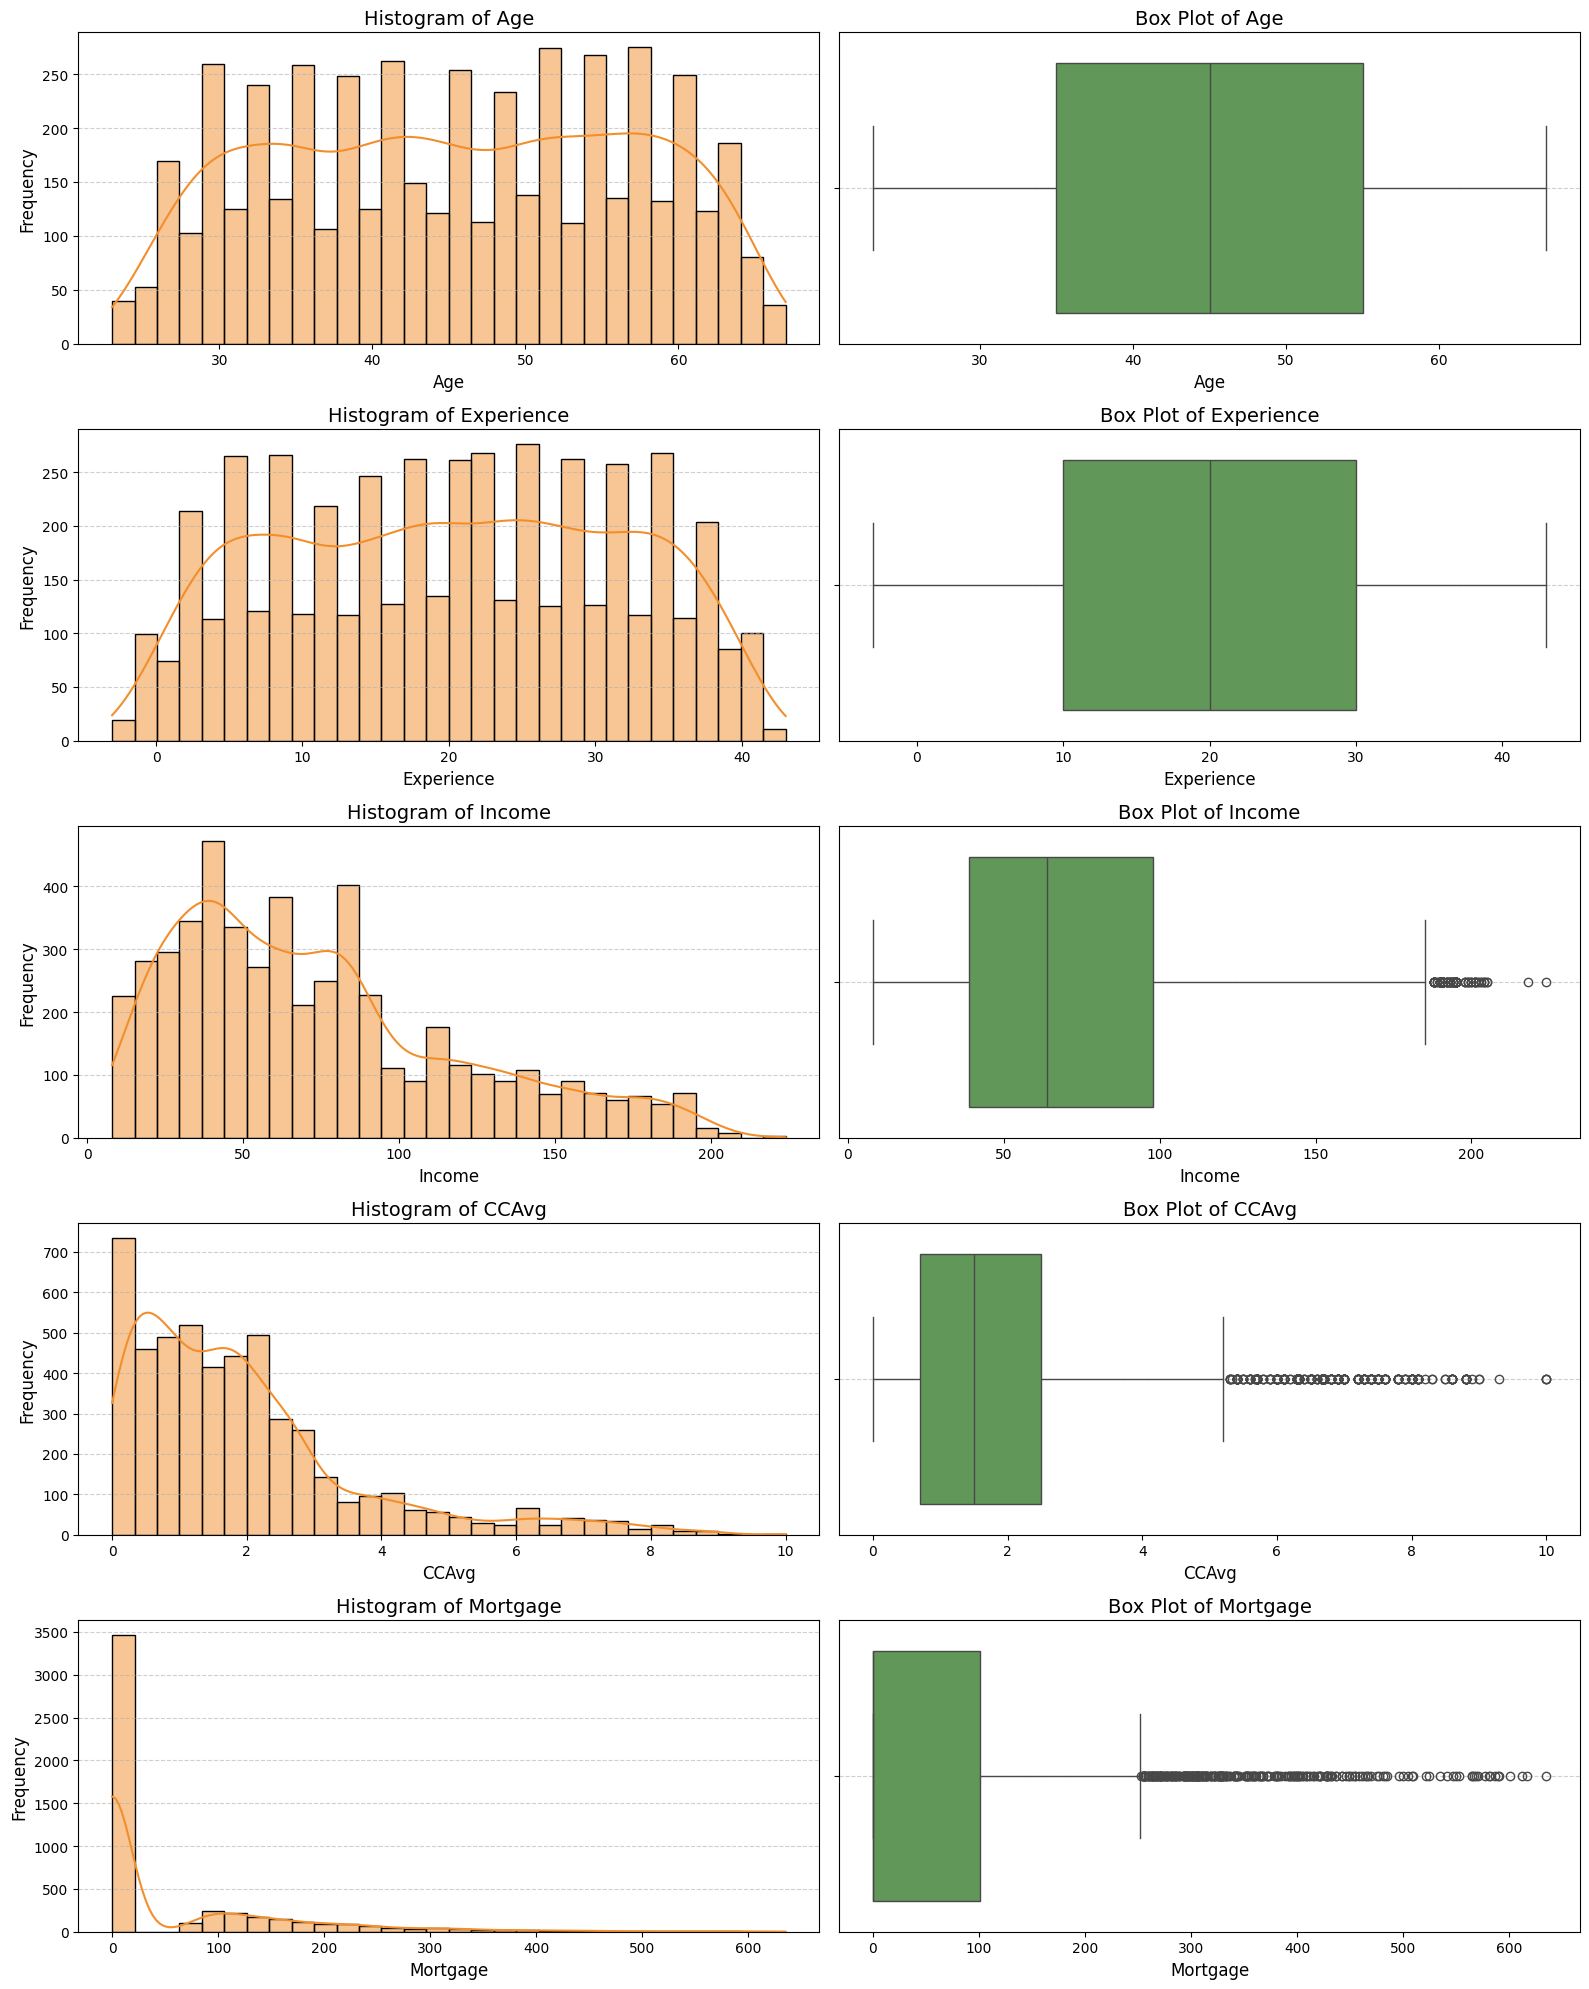

               Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    20.104600    73.774200     1.937938    56.498800
std      11.463166    11.467954    46.033729     1.747659   101.713802
min      23.000000    -3.000000     8.000000     0.000000     0.000000
25%      35.000000    10.000000    39.000000     0.700000     0.000000
50%      45.000000    20.000000    64.000000     1.500000     0.000000
75%      55.000000    30.000000    98.000000     2.500000   101.000000
max      67.000000    43.000000   224.000000    10.000000   635.000000


In [65]:
# Define a professional color palette
hist_color = '#F28E2C'  # Muted orange for histograms
box_color = '#59A14F'   # Muted green for box plots

# Define figure size
plt.figure(figsize=(16, 20))

# Define list of numerical features to plot
# Note: The below features are continous ones
num_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Loop through numerical features to plot histograms and box plots side by side
for i, feature in enumerate(num_features):
    # Histogram
    plt.subplot(len(num_features), 2, 2*i + 1)  # Odd-numbered subplot
    sns.histplot(data=data, x=feature, kde=True, bins=30, color=hist_color)
    plt.title(f'Histogram of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Box plot
    plt.subplot(len(num_features), 2, 2*i + 2)  # Even-numbered subplot
    sns.boxplot(data=data, x=feature, color=box_color)
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Calculate and display summary statistics for all numerical features
summary_stats = data[num_features].describe()
print(summary_stats)


#### Observations
1. Age:
    * Explanation: The histogram shows the age distribution is fairly uniform across the range (23-67years). The Box plot indicates there are no significant outliers.
    * Observation: Most customers are evenly distributed across various age groups, which suggests age diversity among the customer base.

2. Experience:
    * Explanation: The histogram reveals an approximately uniform distribution, but there are negative values, which are invalid for this feature. The box plot shows no extreme outliers aside from the negatives.
    * Observation: Negative values in Experience need to be corrected or treated as missing data to avoid analysis error.

3. Income: 
    * Explanation: The histogram shows the data is positively skewed, with most incomes below 100. The box plot highlights a few high-income outliers.
    * Observation: A large portion of customers fall into middle-income ranges, while high-income customers are fewer and may represent specific segments.

4. CCAvg:
    * Explanation: The histogram displays a positively skewed distribution, where most customers hava a low credit card spend (below 2,000). The box plot shows some outliers in high spending.
    * Observation: Customers with higher credit card spending might exhibit different financial behaviours, which could be a factor in loan approval.

5. Mortgage:
    * Explanation: The histogram is heavily skewed toward zero, indicating most customers do not have a mortgage. The box plot highlights significant outliers for large mortgages.
    * Observation: Most customers do not carry mortgages, but those who do may be in different financial circumstances.

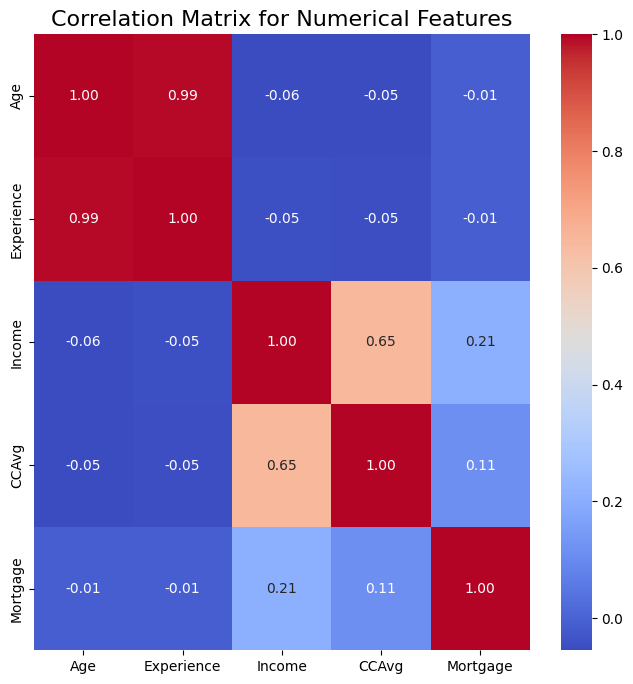

In [66]:
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Correlation matrix for numerical features
plt.figure(figsize=(8, 8))
corr_matrix = data[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Numerical Features", fontsize=16)
plt.show()


#### Observations
Here are some key observations from the correlation matrix:

1. Strong Positive Correlation between Age and Experience:
The correlation coefficient between Age and Experience is 0.99, indicating a near-perfect positive correlation. This is expected, as experience generally increases with age.

2. Moderate Positive Correlation between Income and CCAvg:
Income and CCAvg (Credit Card Average Spending) have a correlation of 0.65, suggesting that individuals with higher incomes tend to spend more on credit cards.

3. Weak Correlation of Mortgage with Other Features:
Mortgage shows very weak correlations with all other variables (around 0.1 or lower), indicating that mortgage amounts do not have a strong linear relationship with age, experience, income, or credit card spending.

4. Negative Correlation between Age/Experience and Income:
There is a slight negative correlation (around -0.05 to -0.06) between Age/Experience and Income, suggesting that younger individuals might have higher earnings in this dataset, or older individuals may have plateaued in income.

Possible Insights:

* The strong correlation between Age and Experience could lead to multicollinearity issues in a regression model.
* Since Income and CCAvg are moderately correlated, they might influence loan approval decisions.
* Mortgage having weak correlations with other features suggests it might be an independent factor in loan decisions.

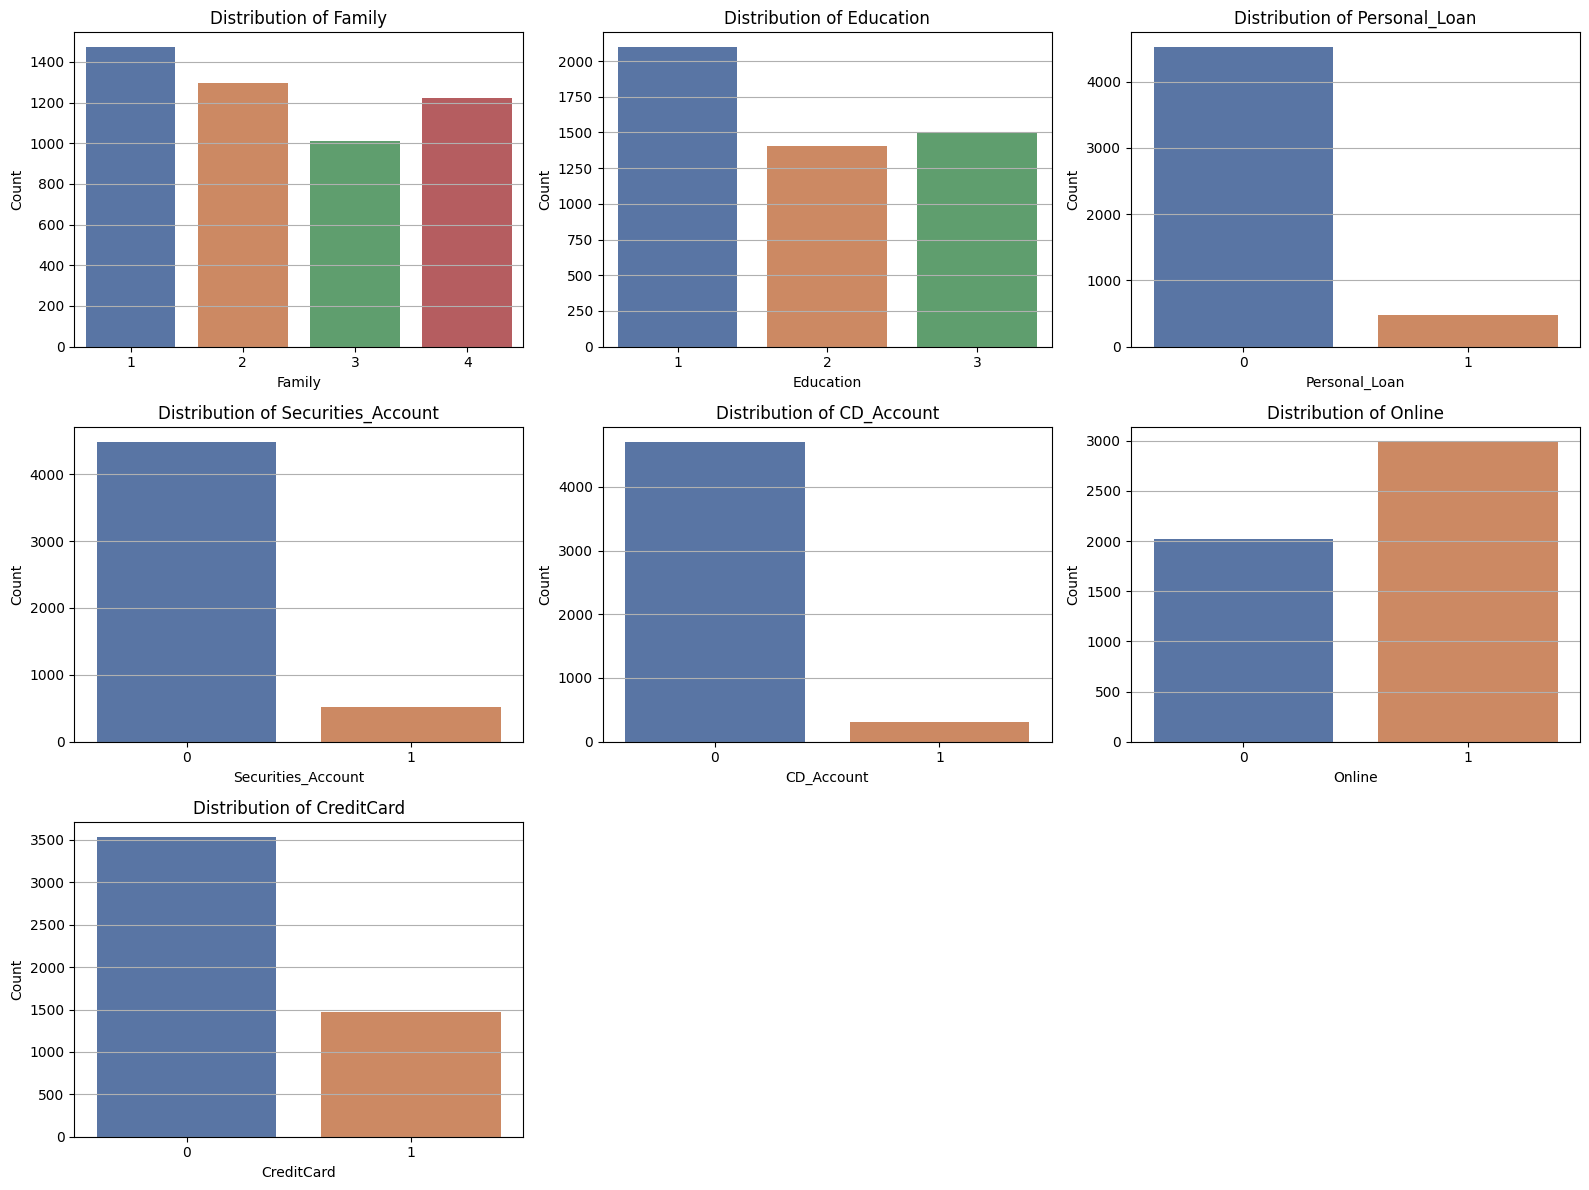

In [67]:
# Define the list of Binary features
binary_features = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

# Set figure size for better visualization
plt.figure(figsize=(16, 12))

# Loop through each categorical feature
for i, feature in enumerate(binary_features):
    plt.subplot(3, 3, i + 1)  # Arrange plots in a grid (3 rows, 3 columns)
    
    # Calculate value counts
    value_counts = data[feature].value_counts()
    
    # Create a bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, dodge=False, legend=False,palette='deep')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y')

plt.tight_layout()  # Adjust spacing between plots
plt.show()



##### Observations
1. Family: 
    * Explanation: The count plot shows a relatively even distribution among family sizes, with size 1 being the most common.
    * Observation: Family size may influence financial behaviour, with large families possibly requiring more loans.

2. Education:
    * Explanation: The count plot shows Education Level 1 is most common, followed by Level 3, and Level 2
    * Observation: Education level could influence financial decisions or eligibility for loans.

3. Personal_Loan: 
    * Explanation: The count plot shows a strong imbalance, with most customers not taking personal loans.
    * Observations: This imbalance needs attention during modeling

4. Securities_Account:
    * Explanation: Most customers do not have securities accounts, as shown by the count plot.
    * Observation: Having a securities account could indicate a higher net worth or different financial position.

5. CD_Account: 
    * Explanation: The majority of customers do not have certificate of deposit accounts.
    * Observation: Customers with CDs may exhibit conservative investment strategies.

6. Online:
    * Explanation: A majority of customers use online banking, as reflected in the count plot.
    * Observation: Online banking users may have different engagement levels with the bank compared to offline users.

7. CreditCard:
    * Explanation: Most customers do not have credit cards issued by the bank.
    * Observation: Customers without credit cards might be less engaged with the bank's services.


### **Bivariate Analysis**

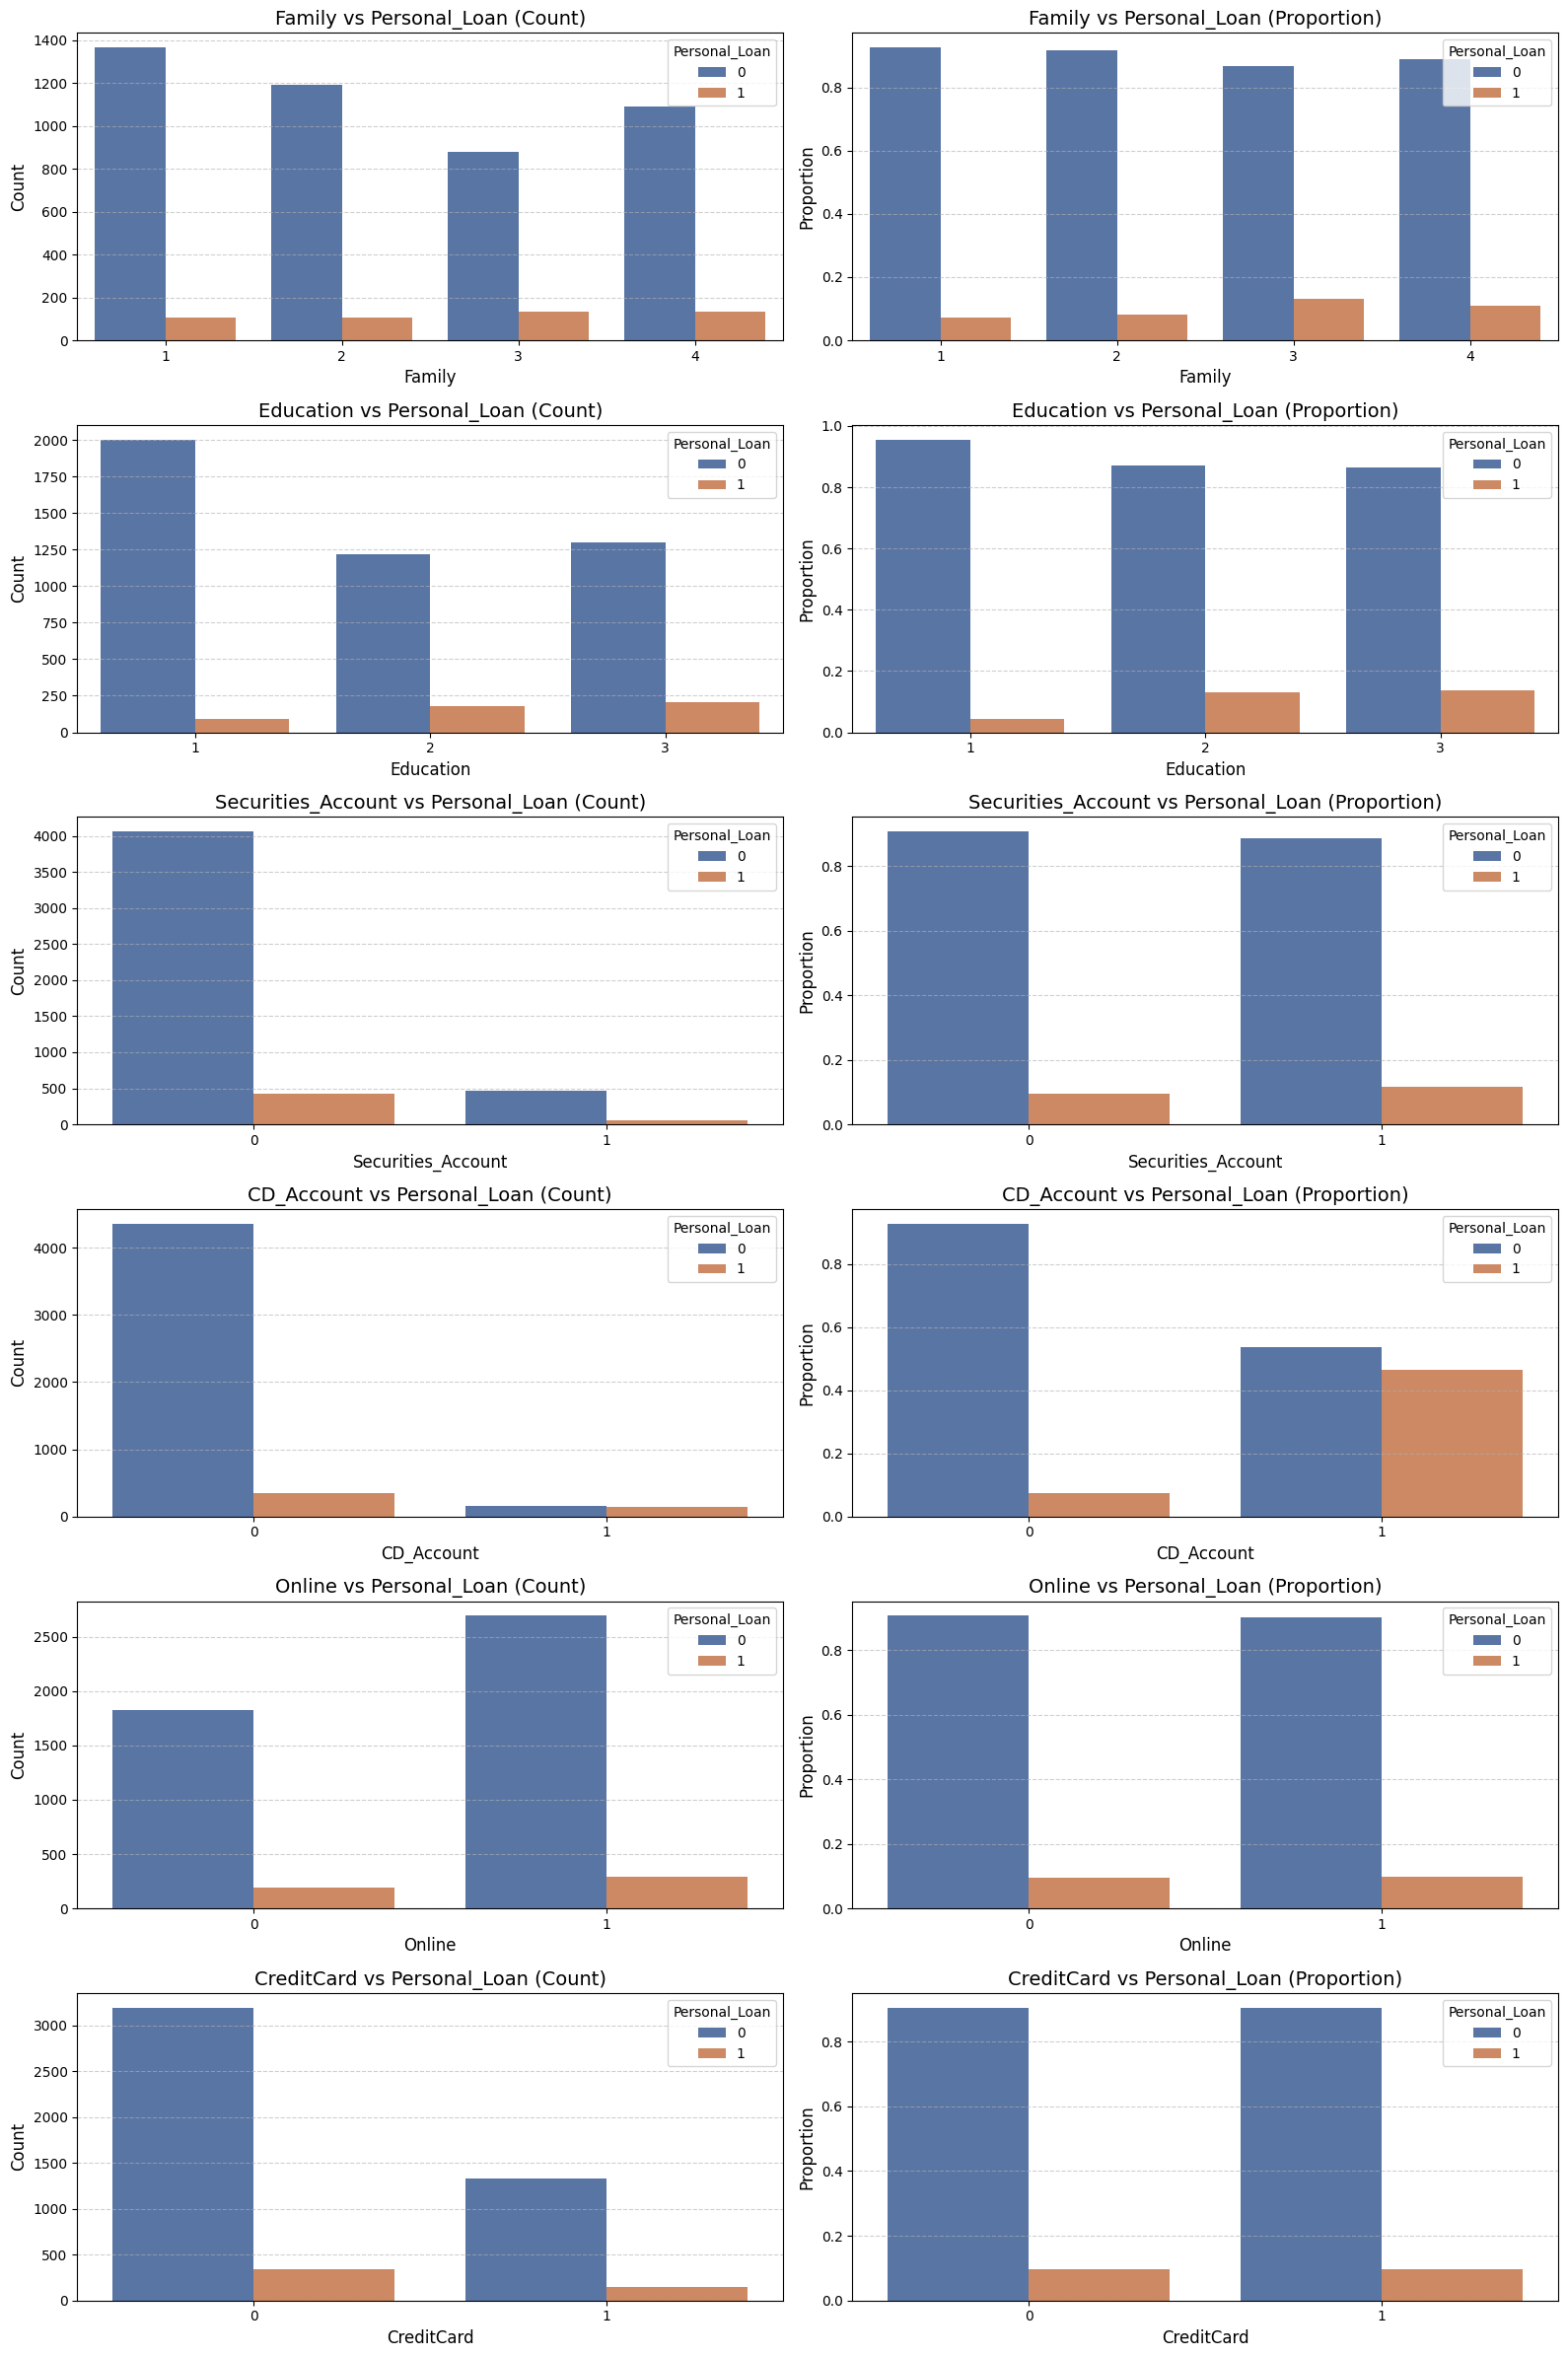

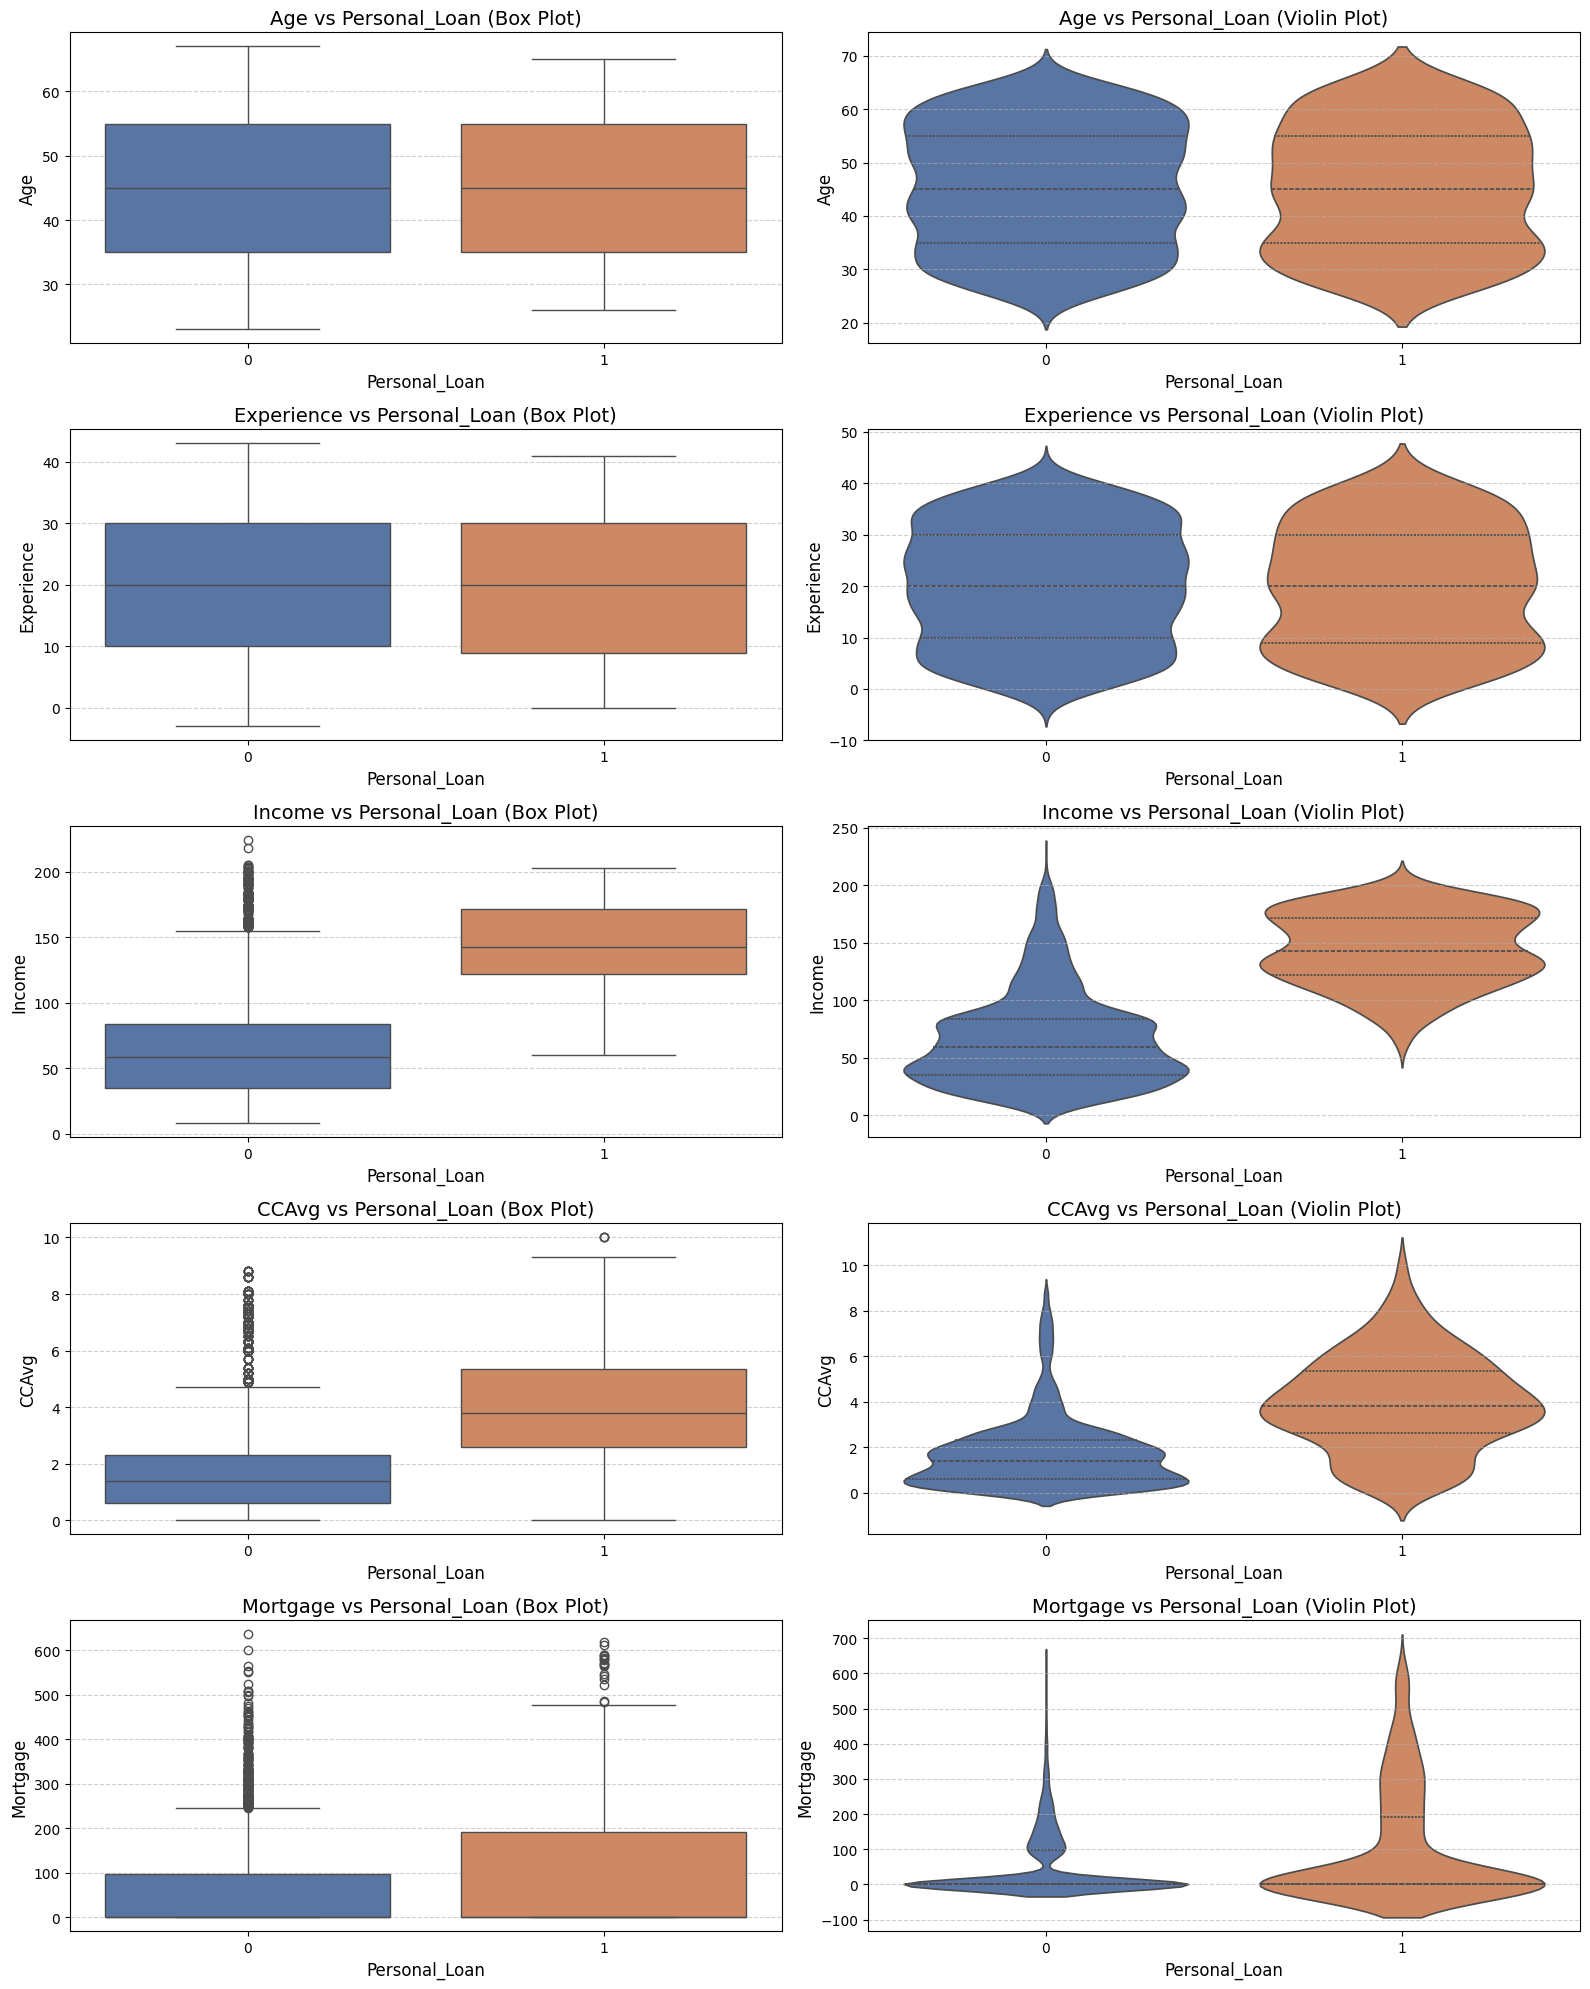

In [ ]:
# Define lists for categorical and numerical variables
categorical_vars = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Bivariate Analysis for Categorical vs Target (Personal_Loan)
fig, axes = plt.subplots(len(categorical_vars), 2, figsize=(16, len(categorical_vars) * 4))

for i, var in enumerate(categorical_vars):
    # Count plot (absolute values)
    sns.countplot(data=data, x=var, hue='Personal_Loan', ax=axes[i, 0],palette='deep')
    axes[i, 0].set_title(f'{var} vs Personal_Loan (Count)', fontsize=14)
    axes[i, 0].set_xlabel(var, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.6)

    # Proportional bar plot
    prop_data = data.groupby(var)['Personal_Loan'].value_counts(normalize=True).rename("Proportion").reset_index()
    sns.barplot(data=prop_data, x=var, y='Proportion', hue='Personal_Loan', ax=axes[i, 1], palette='deep')
    axes[i, 1].set_title(f'{var} vs Personal_Loan (Proportion)', fontsize=14)
    axes[i, 1].set_xlabel(var, fontsize=12)
    axes[i, 1].set_ylabel('Proportion', fontsize=12)
    axes[i, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Bivariate Analysis for Numerical vs Target (Personal_Loan)
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(16, len(numerical_vars) * 4))

for i, var in enumerate(numerical_vars):
    # Box plot
    sns.boxplot(data=data, x='Personal_Loan', y=var, ax=axes[i, 0], palette='deep', hue='Personal_Loan', legend=False);
    axes[i, 0].set_title(f'{var} vs Personal_Loan (Box Plot)', fontsize=14)
    axes[i, 0].set_xlabel('Personal_Loan', fontsize=12)
    axes[i, 0].set_ylabel(var, fontsize=12)
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.6)

    # Violin plot
    sns.violinplot(data=data, x='Personal_Loan', y=var, ax=axes[i, 1], palette='deep', inner='quartile', hue='Personal_Loan', legend=False);
    axes[i, 1].set_title(f'{var} vs Personal_Loan (Violin Plot)', fontsize=14)
    axes[i, 1].set_xlabel('Personal_Loan', fontsize=12)
    axes[i, 1].set_ylabel(var, fontsize=12)
    axes[i, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#### Detailed Observations for Each Graph

Categorical Variables vs. Target (Count and Proportional Bar Plots):
1. Family:

    * Count Plot: Categories with more family members (e.g., 4) show higher counts for Personal_Loan=1. Categories with fewer family members (1 or 2) have a higher count for Personal_Loan=0.
    * Proportional Plot: A higher proportion of customers with families of 4 opted for loans, while smaller families (1 or 2) showed lower acceptance.

2. Education:

    * Count Plot: Customers with higher education levels (Education=3) dominate the Personal_Loan=1 category, while lower education levels (1) mostly declined loans.
    * Proportional Plot: The proportion of loan acceptance increases significantly with higher education levels, indicating education might strongly influence loan decisions.

3. Securities_Account:

    * Count Plot: Customers without securities accounts (0) have a higher count for Personal_Loan=1.
    * Proportional Plot: A larger proportion of customers without a securities account opted for loans, suggesting this variable might inversely correlate with loan acceptance.

4. CD_Account:

    * Count Plot: Customers with certificate of deposit accounts (1) are more likely to accept loans, though they are fewer in number.
    * Proportional Plot: A significantly higher proportion of customers with a CD_Account=1 accepted loans compared to those without (0).

5. Online:

    * Count Plot: Customers who use online banking (1) have a slightly higher count for Personal_Loan=1, but the difference is marginal.
    * Proportional Plot: The proportion of loan acceptance is only slightly higher for online users, suggesting online usage might not be a strong predictor.

6. CreditCard:

    * Count Plot: Customers who own credit cards (1) have higher counts for both loan acceptance and rejection.
    * Proportional Plot: A slightly larger proportion of credit card owners (1) accepted loans compared to non-owners (0).


Numerical Variables vs. Target (Box and Violin Plots):

1. Age:

    * Box Plot: Both Personal_Loan=0 and 1 have similar medians, but Personal_Loan=1 shows slightly higher variability in older age groups.
    * Violin Plot: The density is higher for younger customers around the lower age range for Personal_Loan=0. For Personal_Loan=1, the density spreads more uniformly across ages, with peaks in middle-age groups.

2. Experience:

    * Box Plot: Similar to age, the distributions overlap heavily between Personal_Loan=0 and 1, with no clear distinction.
    * Violin Plot: The density for Personal_Loan=1 is more uniform across experience levels, while for Personal_Loan=0, it peaks at lower experience levels.

3. Income:

    * Box Plot: Customers who accepted loans (Personal_Loan=1) have significantly higher median incomes compared to those who declined. Outliers with high incomes are present in both categories.
    * Violin Plot: The density is heavily skewed towards higher income for Personal_Loan=1, while for Personal_Loan=0, it peaks in the lower income ranges.

4. CCAvg:

    * Box Plot: A clear distinction exists, with Personal_Loan=1 customers having higher credit card average spends. The median and interquartile ranges are notably different.
    * Violin Plot: The density for Personal_Loan=1 skews towards higher values, with a peak at moderate spending levels. For Personal_Loan=0, the density clusters around lower spending levels.

5. Mortgage:

    * Box Plot: Both categories have similar medians, but Personal_Loan=1 has more variability, with several outliers at higher mortgage values.
    * Violin Plot: The density for Personal_Loan=0 is concentrated at lower mortgage values, while for Personal_Loan=1, the density spreads more evenly across higher values.


Key Insights:

1. Categorical Variables:

    * Education and CD_Account are the strongest indicators of loan acceptance, as both show significant differences in proportions between categories.
    * Binary features like Securities_Account and CreditCard provide additional insight but might not be standalone predictors.

2. Numerical Variables:

    * Income and CCAvg have the most noticeable differences between Personal_Loan=0 and 1, suggesting they are key drivers of loan decisions.
    * Age and Experience show overlapping distributions, indicating weaker predictive power.
    * Mortgage adds some variability but might be less impactful due to overlapping densities.

##  **Data Preparation for Modeling**

In [69]:
# Defining the explanatory (independent) and response (dependent) variable
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

In [70]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [71]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [72]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 13)
Shape of test set: (1000, 13) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## **Model Building**

### **Decision Tree**

In [73]:
# Creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42) 

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

We define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [74]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification(model, predictors, target):

    """
    Function to compute different metrics to check classification model performance

    model: Classifier
    predictors: Independent variables
    target : dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred) # To compute accuracy
    recall = recall_score(target, pred) # TO compute recall
    precision = precision_score(target, pred) #f to compute precision
    f1 = f1_score(target, pred) # to compute F1-score

    #Creating an instance of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [75]:
def plot_confusion_matrix(model, predictors, target):
    """ 
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    #Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    #Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2) #reshaping to a matrix

    #Set the figure size for the plot
    plt.figure(figsize=(6,4))

    #Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    #Add a label to the y-axis
    plt.ylabel("True Lable")

    #Add a label to the x-axis
    plt.xlabel("Predicted label")

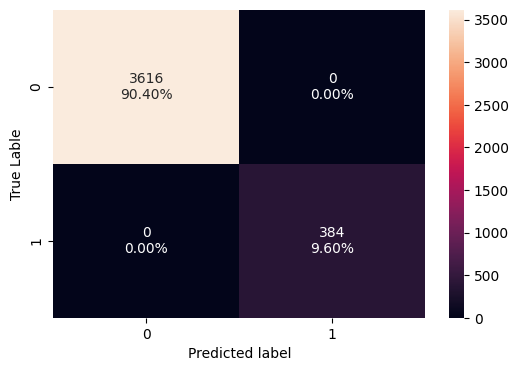

In [76]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [77]:
dtree1_train_pref = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_pref

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


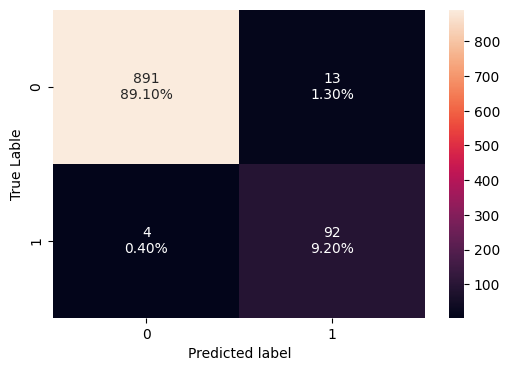

In [78]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [79]:
dtree1_test_pref = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_pref

,Accuracy,Recall,Precision,F1
0,0.983,0.958333,0.87619,0.915423


- There is a huge difference between the training and test F1 Scores.
- This indicates that the model is overfitting.

#### Visualizing the Decision Tree

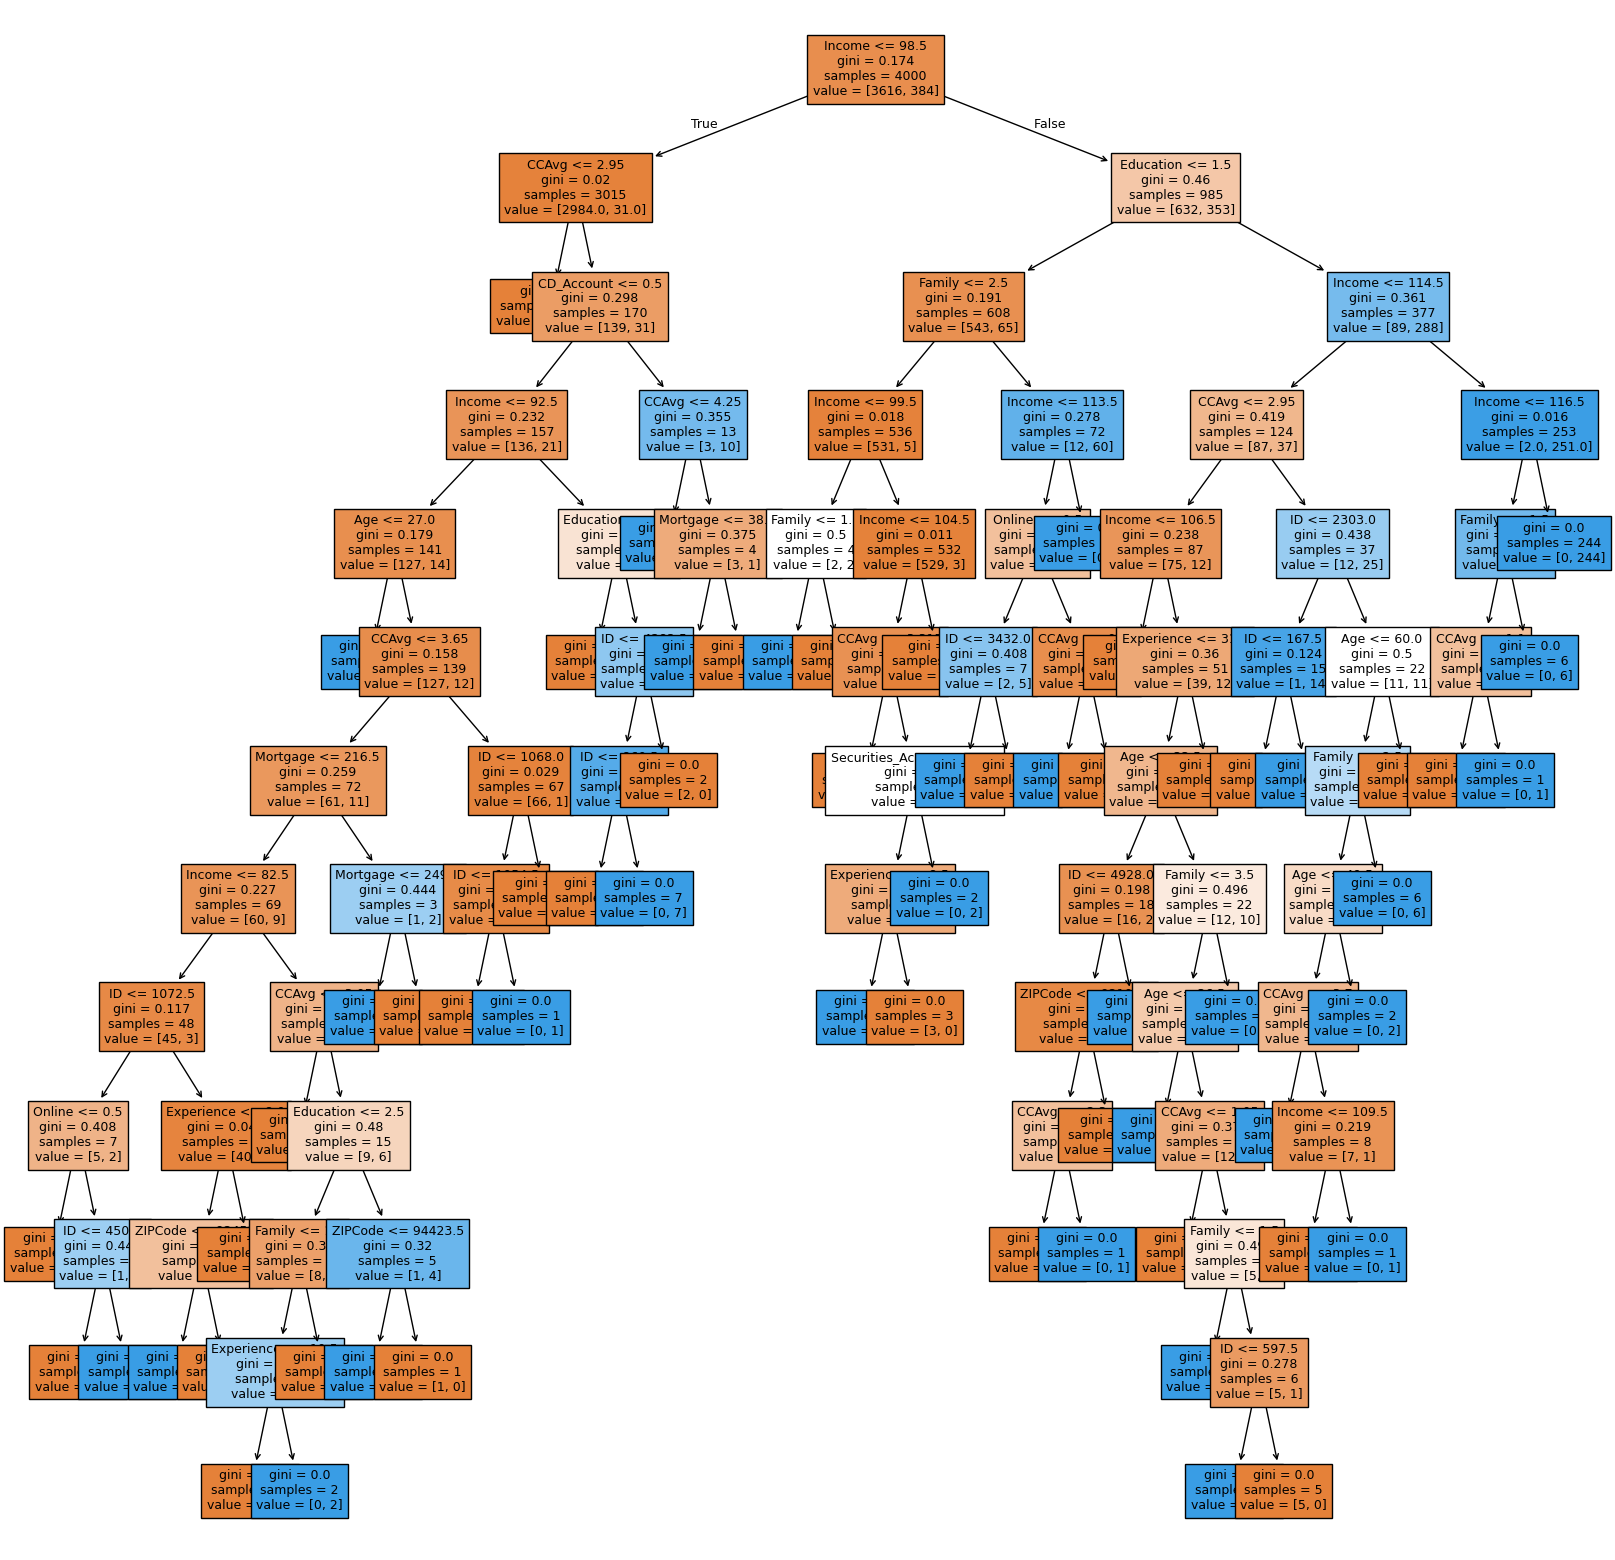

In [80]:
# List of feature names in X_train
feature_names = list(X_train.columns)

# Set the figure size for the plot
plt.figure(figsize=(20,20))

# Plotting the decision tree
out = tree.plot_tree(
    dtree1,                             # Decision tree classifier model
    feature_names=feature_names,        # List of feature names (columns) in the dataset
    filled=True,                        # Fill the nodes with colors based on class
    fontsize= 9,                        # font size for the node text
    node_ids=False,                     # do not show the ID of each node
    class_names=None,                   # Weather or not to display class names
)

#add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")     # Set arrow color to black
        arrow.set_linewidth(1)           # Set arrow linewidth to 1

# displaying the plot
plt.show()

*  We can observe that this is a very complex tree

In [81]:
# Printing the text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,                       # Specify the model
        feature_names=feature_names,   # Specify the feature names
        show_weights=True             # Specify wheather or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ID <= 1072.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ID <= 450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ID >  450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- ID >  107

### **Decision Tree (Pre-Pruning)**

In [82]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2,11,2)
max_leaf_nodes_values = np.arange(10, 15, 10)
min_samples_split_values = np.arange(10, 51, 10)

#Initialize variables to store the best model and it's performance
best_estimator = None
best_score_diff = float('inf')

#Iterate over all combimations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters 
            estimator = DecisionTreeClassifier(
                max_depth=max_depth, 
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make prediction on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            #Calculate the F1 Scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # Calculate the absoulte difference between training and test F1 Scores
            score_diff = abs(train_f1_score - test_f1_score)

            # Update the best estimator and best score if the current one has a similar score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [83]:
# Create an instance of the best model
dtree2 = best_estimator

#Fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

##### Model Evaluation

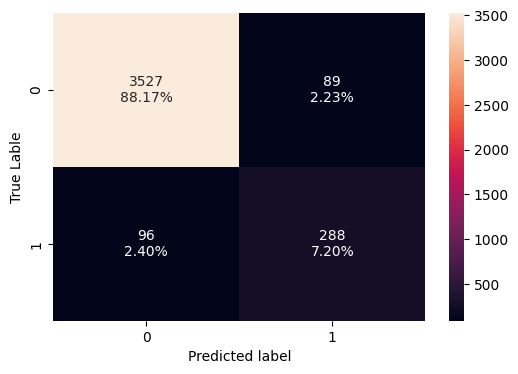

In [84]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [85]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.95375,0.75,0.763926,0.756899


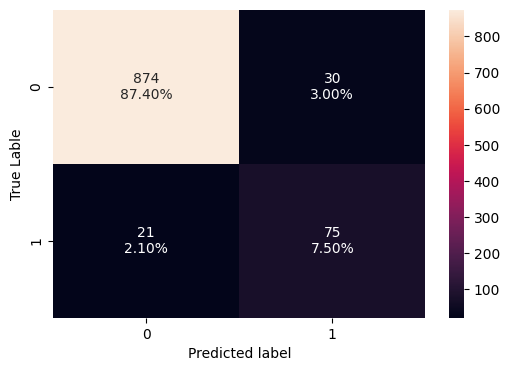

In [86]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [87]:
dtree2_test_pref = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_pref

,Accuracy,Recall,Precision,F1
0,0.949,0.78125,0.714286,0.746269


Detailed Observations:
Performance Comparison (Pre-Pruning vs. Post-Pruning):

Pre-pruned Decision Tree:

Train Performance:

Accuracy: 95.375%
Recall: 75%
Precision: 76.39%
F1 Score: 75.69%

Test Performance:

Accuracy: 94.9%
Recall: 78.13%
Precision: 71.43%
F1 Score: 74.63%
The pre-pruned model performs well, with a slight decrease in performance between the training and test sets. This indicates a small overfitting issue, where the model has learned more about the training data than what it generalizes well to unseen data.

The pre-pruned decision tree uses a moderate number of features, and while the model performs decently on the test set, its precision and F1 score are a bit lower, suggesting it’s missing some of the finer details in predictions, especially when it comes to identifying positive cases (lower recall and precision).

#### Visualizing the decision tree

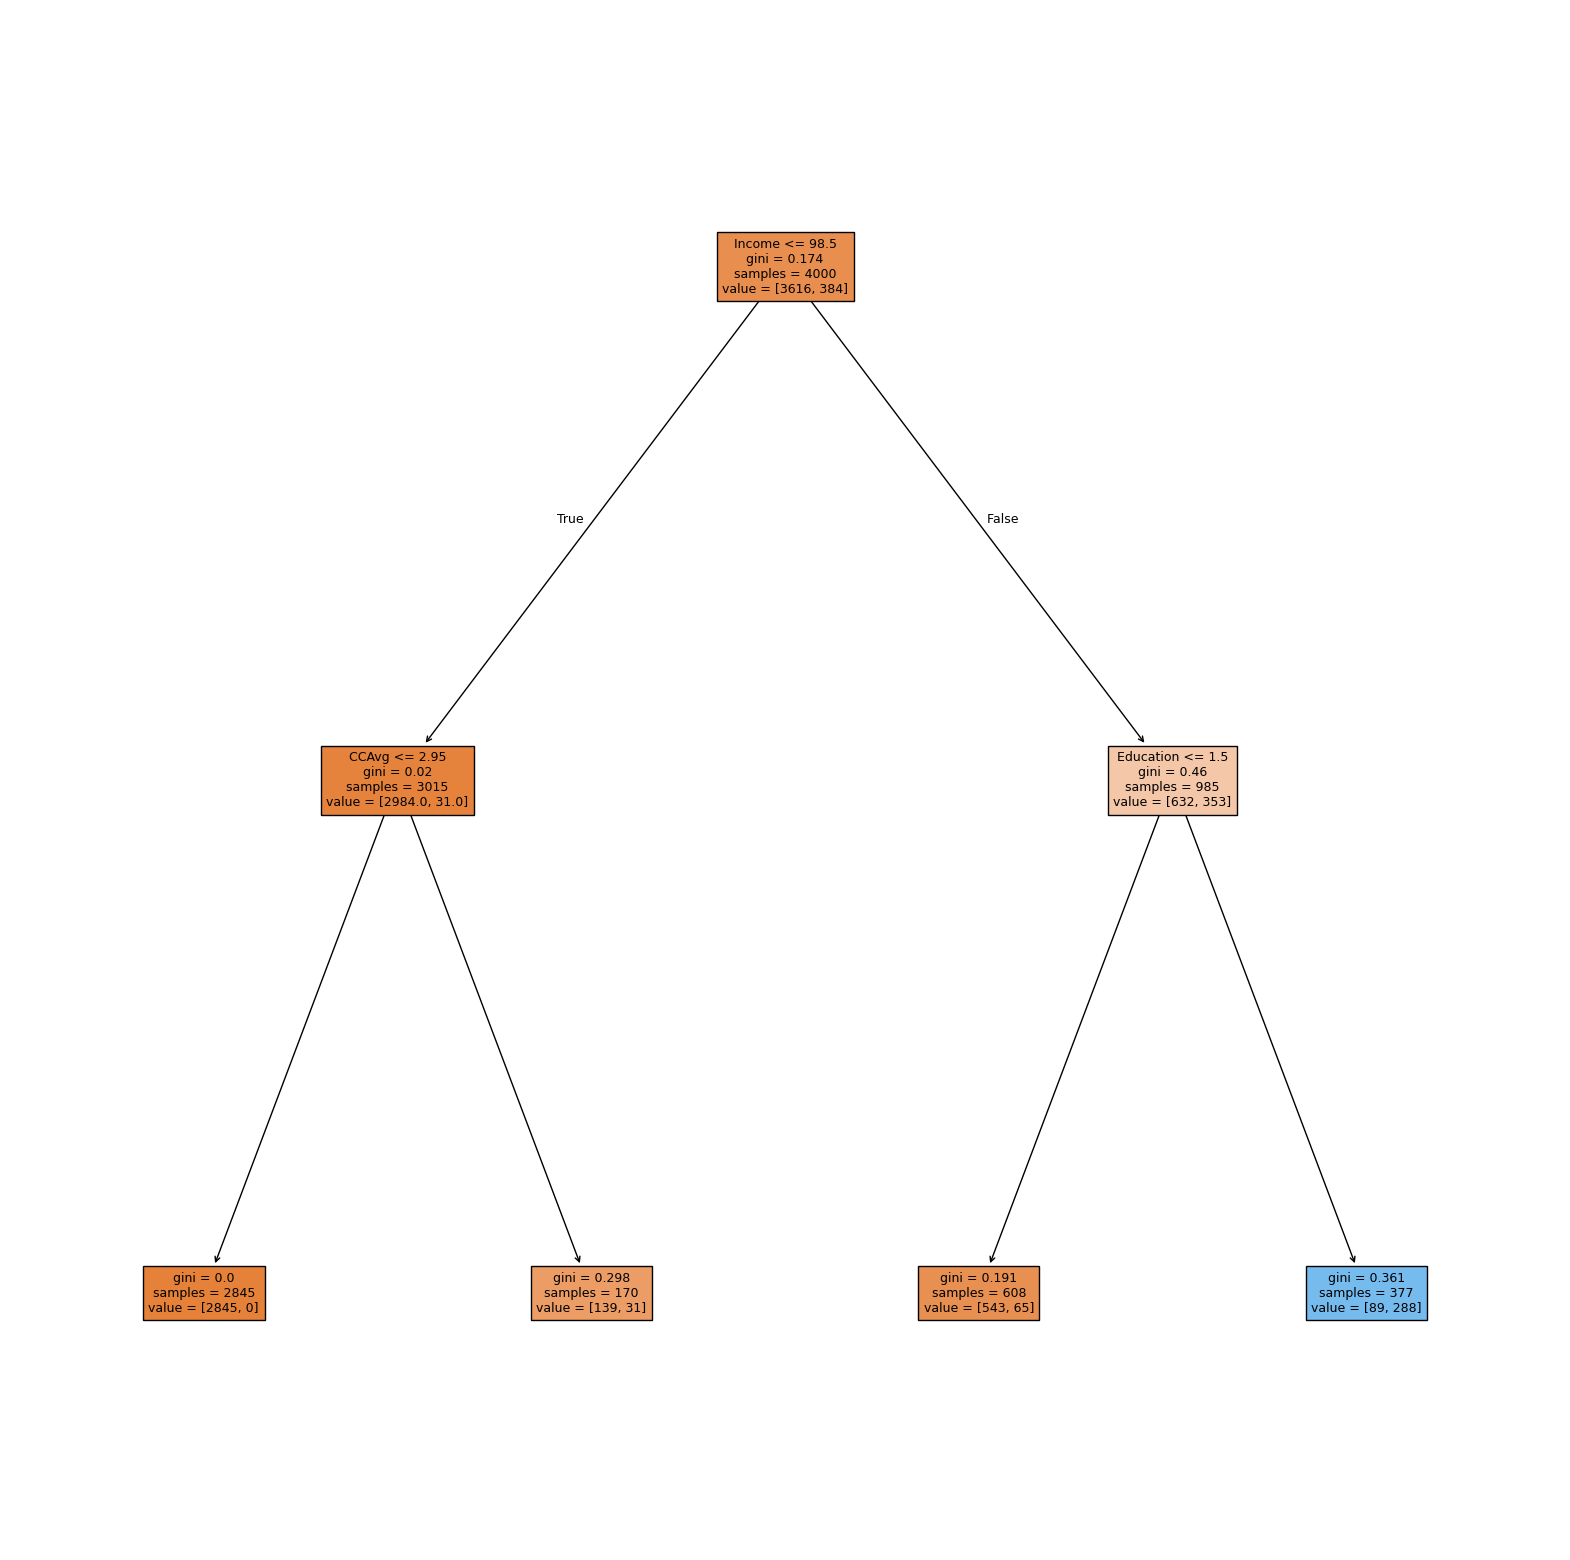

In [88]:
# List of feature names in X_train
feature_names = list(X_train.columns)

# Set the figure size 
plt.figure(figsize=(20,20))

#Plotting the tree
out = tree.plot_tree(
    dtree2,                             # Decision tree classifier model
    feature_names=feature_names,        # List of restore names (columns) in the dataset
    filled=True,                        # fill the nodes with colors based on class
    fontsize=9,                         # font size for the node text
    node_ids=False,                     # do not show the ID of each node
    class_names=None,                   # Wheather or not to display class names
)

# add arrows to the decision tree splits if they are missing 
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")        # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot

plt.show()

- This is a far less complex tree than the previous one.
- We can observe the decision rules much more clearly in the plot.

In [89]:
# print a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,         #Specify the model
        feature_names=feature_names,    # Specify the feature names
        show_weights=True               # specify wheather or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [139.00, 31.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- weights: [543.00, 65.00] class: 0
|   |--- Education >  1.50
|   |   |--- weights: [89.00, 288.00] class: 1



### **Decision Tree Post-Pruning**

In [90]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

#Compare the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [91]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000235,0.000471
2,0.000244,0.000958
3,0.000246,0.001451
4,0.000306,0.002369
5,0.000331,0.003361
6,0.000333,0.003695
7,0.000333,0.004028
8,0.000373,0.005520
9,0.000375,0.005895


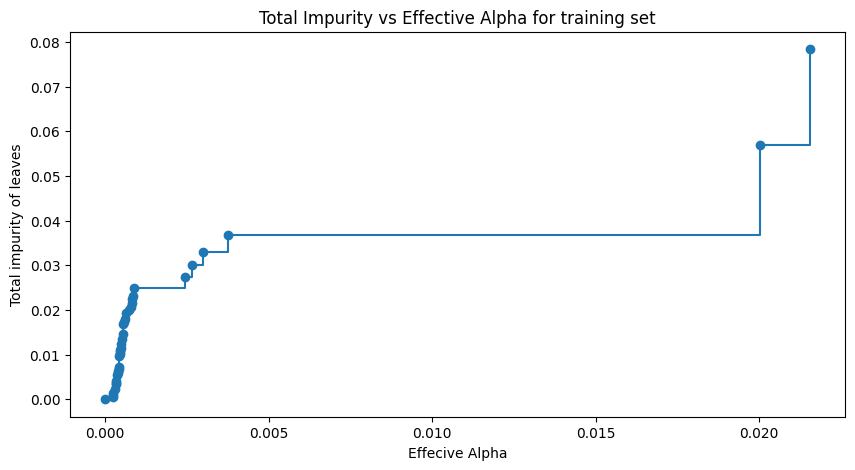

In [92]:
# Create a figure
fig, ax = plt.subplots(figsize=(10,5))

# Plot the total impurities versus effective alphas, excluding the last value,
# Using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

#Set the x-axis label
ax.set_xlabel("Effecive Alpha")

#Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

#### **Total Impurity vs Effective Alpha**
* The Graph shows how total impurity changes with different values of ccp_alpha (pruning parameter)
* The impurity value represents how mixed the data points are in the leaves of the tree

#### Observations:

* As ccp_alpha increases, total impurity also increases.
* This happens because pruning removes nodes, leading to fewer splits and more mixed (impure) leaves.
* The last few values of ccp_alpha show a steep increase in impurity indicating excessive pruning.


In [93]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:

    # Create an instane of the Decision Tree Classifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)


# Print the number of nodes in the last tree along with it's ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
    

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815693


- We remove the last element in
``clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

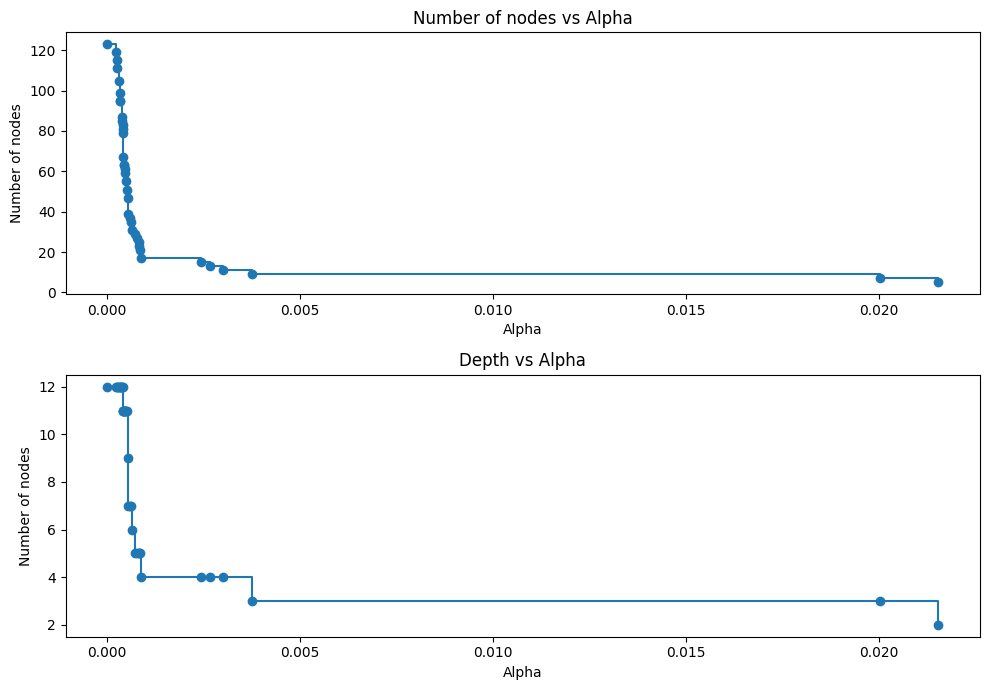

In [94]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extrace the number of nodes in the each tree classifier 
node_counts = [clf.tree_.node_count for clf in clfs]

#Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

#Create a figure and a set of subplots
fig, ax = plt.subplots(2,1, figsize=(10,7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker='o',drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")


#Plot the depth of tree versus ccp_alpha on the second subplot
ax[1].plot(ccp_alphas, depth, marker='o',drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Number of nodes")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplot to avoid overlap
fig.tight_layout()

#### **Number of Nodes vs Alpha**

* This graph shows how the number of nodes in the decision tree changes with ccp_alpha.
* More nodes mean a more complex tree, while fewer nodes indicate a pruned, simpler tree.

#### Observations:
* As ccp_alpha increases, the number of nodes decreases.
* Initially, a small increase in alpha leads to a gradual reduction in nodes.
* For high alpha values, the number of nodes drops sharply, meaning excessive pruning is happening.
* If pruning is too aggressive, the tree loses its ability to capture patterns in the data, leading to underfitting.


#### **Depth vs Alpha**

* This graph shows how the maximum depth of the tree changes with increasing ccp_alpha.
* Deeper trees capture more complex patterns, while shallower trees are more generalized.

#### Observations:
* Similar to node count, tree depth decreases as pruning increases.
* The tree initially maintains a good depth, but at higher alpha values, the depth decreases sharply.
* The depth becomes too small, the tree may not be able to make good predictions, leading to underfitting.

In [95]:
train_f1_scores = [] # initialize an empty list to score F1 Scores for training set for each decision tree

# Iterate through each decision tree classifier in "clfs"
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    #Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_score list
    train_f1_scores.append(f1_train)

In [96]:
test_f1_scores = [] #Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 Score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_score list
    test_f1_scores.append(f1_test)

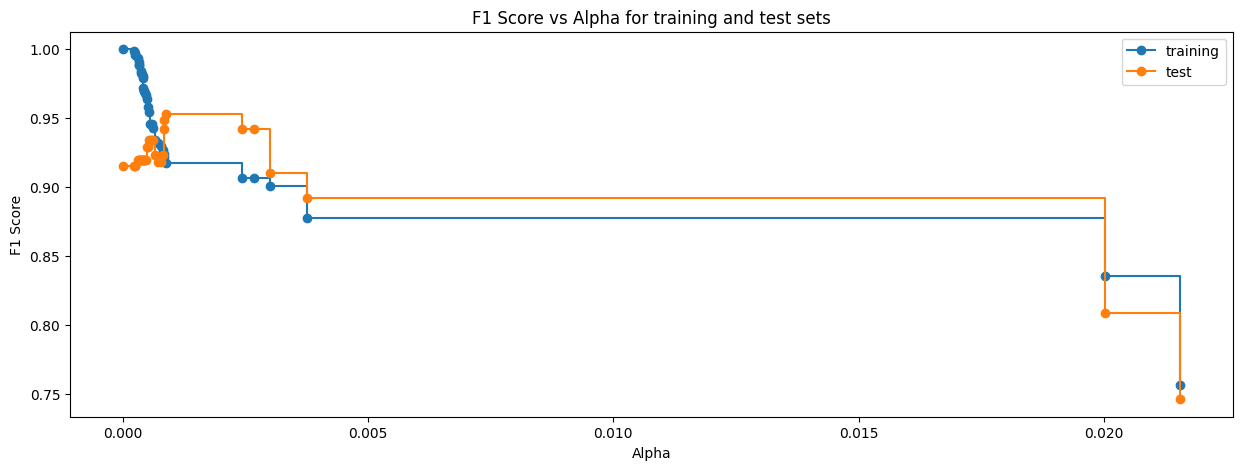

In [97]:
# Create a figure
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("Alpha") #Set the label for the x-axis
ax.set_ylabel("F1 Score") # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets") # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 Score against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend(); # Add a legend to the plot

#### **F1 Score vs Alpha (Training & Test Set)**

* This graph compares F1 scores for the training and test sets across different pruning levels (ccp_alpha).
* A high F1 score means the model balances precision and recall well.

#### Observations:
* The training F1 score is always higher than the test F1 score, which is expected because the model learns patterns from training data.
* As pruning increases (ccp_alpha increases), the training F1 score decreases due to loss of complexity.
* The test F1 score initially improves as pruning removes unnecessary complexity, reducing overfitting.
* However, beyond a certain ccp_alpha, the test F1 score starts decreasing, indicating underfitting.


In [98]:
# Creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# Selecting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)


#### Observations

* The best tree is the one at ccp_alpha = 0.00087, as it balances complexity and generalization.
* Over-pruning results in high impurity, low node count, shallow depth, and poor test performance.
* Under-pruning (small ccp_alpha) can cause overfitting, leading to poor generalization.

#### Model Evaluation

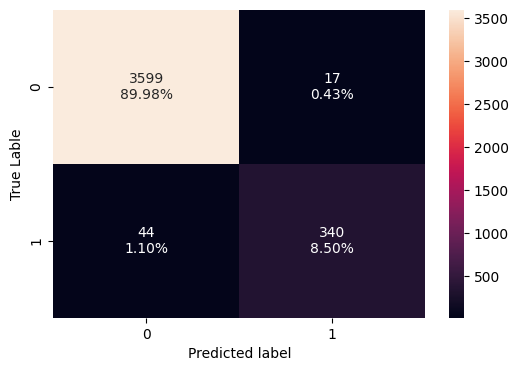

In [99]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [100]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.98475,0.885417,0.952381,0.917679


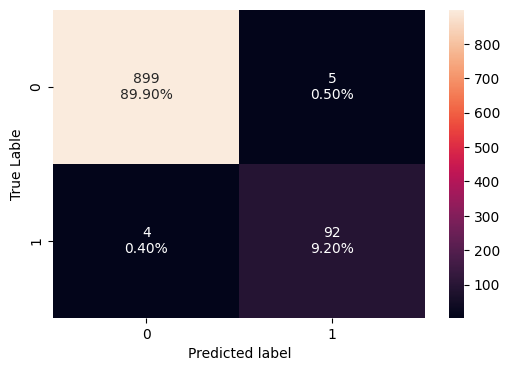

In [101]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [102]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.991,0.958333,0.948454,0.953368


*Post-pruned Decision Tree:*

**Train Performance:**

- Accuracy: 98.475%
- Recall: 88.54%
- Precision: 95.24%
- F1 Score: 91.77%

**Test Performance:**

- Accuracy: 99.1%
- Recall: 95.83%
- Precision: 94.85%
- F1 Score: 95.34%

The post-pruned model shows a significant improvement in performance on both the training and test sets.

Test performance is better than pre-pruning, indicating that the pruning process has helped reduce overfitting and improve generalization.

The post-pruned decision tree has a higher recall, precision, and F1 score, indicating better identification of relevant cases and a more balanced trade-off between false positives and false negatives. This shows that the model is able to generalize better, leading to stronger performance on the test set.

The post-pruned model uses fewer features, with a more simplified structure, potentially reducing prediction time while maintaining a strong predictive performance.

#### Visualizing the Decision Tree

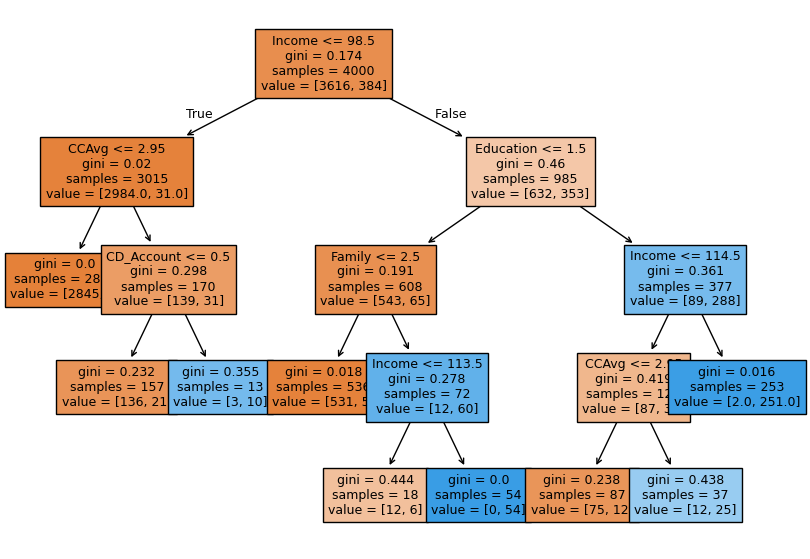

In [103]:
# List of feature names in X_train
feature_names = list(X_train.columns)

# Set the figure size for the plot 
plt.figure(figsize=(10,7))

# Plotting the decision tree
out = tree.plot_tree(
    dtree3,                     # Decision tree classifier model
    feature_names= feature_names,    # List of feature names (columns) in the dataset
    filled=True,                    # filled the nodes with colors based on class
    fontsize=9,                     # font size for the nede text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # Wheather or not to display class names
)

# Add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # Set arrow linewidth to 1

# display the plot
plt.show()

* This is far less complex tree that previous one.
* The model uses Income, CCAvg, Education, CD_Account, Family to determine wheather to customer will take personal loan or not.

In [104]:
# Printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,                          # Specify the model
        feature_names=feature_names,     # Specify the feature names
        show_weights=True                # Specify wheather or not to show the weights associated with the model
    )

)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



## **Model Performance Comparision and Final Model Selection**

In [105]:
# Trainig performance comparision

models_train_comp_df = pd.concat(
    [
        dtree1_test_pref.T, 
        dtree2_train_perf.T, 
        dtree3_train_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training Performance Comparision")
models_train_comp_df

Training Performance Comparision


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983000,0.953750,0.984750
Recall,0.958333,0.750000,0.885417
Precision,0.876190,0.763926,0.952381
F1,0.915423,0.756899,0.917679


In [106]:
# Testing Performance Comparision

models_test_comp_df = pd.concat(
    [
        dtree1_test_pref.T,
        dtree2_test_pref.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)", 
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparision")
models_test_comp_df

Test set performance comparision


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983000,0.949000,0.991000
Recall,0.958333,0.781250,0.958333
Precision,0.876190,0.714286,0.948454
F1,0.915423,0.746269,0.953368


* ***Pre-pruning***:
The performance gap between training and test sets (accuracy drop of ~0.47%) indicates that while the model is trained well, it struggles to generalize fully to unseen data. It likely has some degree of overfitting, where it has captured patterns that don't hold up on the test data.

* ***Post-pruning***:
The smaller gap between training and test performance (accuracy drop of only ~0.1%) suggests that the post-pruned model is better at generalizing, likely due to reduced complexity and a focus on the most important features. Pruning reduces the likelihood of overfitting and allows the model to focus on relevant data points, improving overall prediction quality.

#### Feature Importance

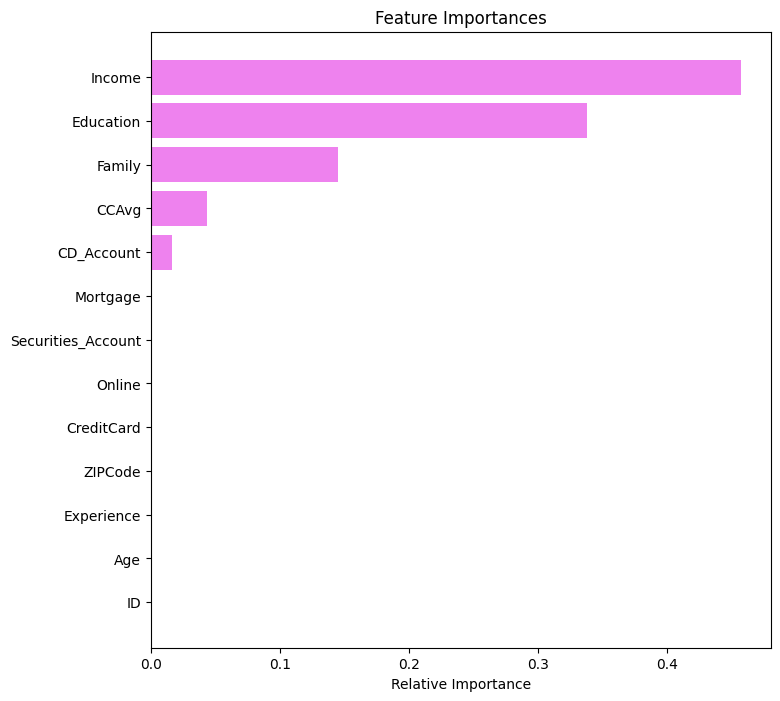

In [107]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observations  

* **Income** : The most influential factor, higher income increases loan approval probability.
* **Education** : Strong impact, Higher education correlates with better financial management.
* **Family size and credict card spending(CCAvg)** : It has moderate importance, showing that spending habits and dependent affect decisions.

* **Features like CD_Account, Mortgege and Zipcode** have minimal influence on the model's predictions.
* The analysis suggests that financial institutions proritize income and education when evaluating pesonal loan application.


## **Marketing Strategy Recommendations:**



✅ Personalized Campaigns → Target high-income, well-educated individuals with tailored loan offers.

✅ Digital Marketing & Credit Card Insights → Use transaction data to predict and offer loans to high-spending customers.

✅ Family-Oriented Loan Promotions → Advertise family loans, education loans, or home loans for married individuals.

✅ Pre-Approved Offers for High-Income Segments → Increase loan adoption with streamlined approvals.

✅ Exclusive Loan Benefits for CD Account Holders → Encourage existing customers to take loans with better terms.

🚀